## 2. Reinforcement Learning: Cliff Walking
### 2.1 Difference between SARSA and Q-learning

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def createQ_table(rows = 4, cols = 12):
    q_table = np.zeros((4, cols * rows)) 
    return q_table

In [3]:
def epsilon_greedy_policy(state, q_table, epsilon):
    # choose a random int from an uniform distribution [0.0, 1.0) 
    decide_explore_exploit  = np.random.random()
    
    if(decide_explore_exploit < epsilon):
        action = np.random.choice(4) # UP = 0, LEFT = 1, RIGHT = 2, DOWN = 3
    else:
        action = np.argmax(q_table[:, state]) # Choose the action with largest Q-value (state value)    
    return action

In [4]:
def move_agent(agent, action):
    # get position of the agent
    (posX , posY) = agent
    # UP 
    if ((action == 0) and posX > 0):
        posX = posX - 1
    # LEFT
    if((action == 1) and (posY > 0)):
        posY = posY - 1
    # RIGHT
    if((action == 2) and (posY < 11)):
        posY = posY + 1
    # DOWN
    if((action) == 3 and (posX < 3)):
        posX = posX + 1
    agent = (posX, posY)
    
    return agent

In [5]:
def get_state(agent, q_table):
    # get position of the agent
    (posX , posY) = agent
    
    # obtain the state value
    state = 12 * posX + posY
    
    # get maximum state value from the table
    state_action = q_table[:, int(state)]
    maximum_state_value = np.amax(state_action) # return the state value with for the highest action
    return state, maximum_state_value

In [6]:
def get_reward(state):
    # game continues
    game_end = False
    # all states except cliff have -1 value
    reward = -1
    # goal state
    if(state == 47):
        game_end = True
        reward = 20
    # cliff
    if(state >= 37 and state <= 46):
        game_end = True
        # Penalize the agent if agent encounters a cliff
        reward = -100

    return reward, game_end

In [7]:
def update_qTable(q_table, state, action, reward, next_state_value, gamma = 0.9, alpha = 0.2):
    q_table[action, state] += alpha * (reward + (gamma * next_state_value) - q_table[action, state])
    return q_table  

def qlearning(epsilon, num_episodes = 1200, gamma_discount = 0.9, alpha = 0.1):
    # initialize all states to 0
    # Terminal state cliff_walking ends

    reward_cache = []
    step_cache = []
    q_table = createQ_table()
    # start iterating through the episodes

    for i in range(num_episodes):
        agent = (3, 0) # starting from left down corner
        game_end = False
        reward_cum = 0 # cumulative reward of the episode
        step_cum = 0 # keeps number of iterations untill the end of the game
        while True:
            # get the state from agent's position
            state, _ = get_state(agent, q_table)
            # choose action using epsilon-greedy policy
            action = epsilon_greedy_policy(state, q_table, epsilon)
            # move agent to the next state
            agent = move_agent(agent, action)
            step_cum += 1
            # observe next state value
            next_state, max_next_state_value = get_state(agent, q_table)
            # observe reward and determine whether game ends
            reward, game_end = get_reward(next_state)
            reward_cum += reward 
            # update q_table
            q_table = update_qTable(q_table, state, action, reward, max_next_state_value, gamma_discount, alpha)
            # update the state
            state = next_state
            if game_end == True:
                break
        #if i % 100 == 0:# epsilon decay
        #    epsilon -= 0.02
        reward_cache.append(reward_cum)
        step_cache.append(step_cum)
    return q_table, reward_cache, step_cache

In [8]:
def update_qTable(q_table, state, action, reward, next_state_value, gamma = 0.9, alpha = 0.2):
    q_table[action, state] += alpha * (reward + (gamma * next_state_value) - q_table[action, state])
    return q_table  

def sarsa(epsilon, num_episodes = 1200, gamma_discount = 0.9, alpha = 0.1):
    # initialize all states to 0
    # Terminal state cliff_walking ends

    reward_cache = []
    step_cache = []
    q_table = createQ_table()
    # start iterating through the episodes

    for i in range(num_episodes):
        agent = (3, 0) # starting from left down corner
        game_end = False
        reward_cum = 0 # cumulative reward of the episode
        step_cum = 0 # keeps number of iterations untill the end of the game
        # get the state from agent's position
        state, _ = get_state(agent, q_table)
        # choose action using epsilon-greedy policy
        action = epsilon_greedy_policy(state, q_table, epsilon)
        while True:
            # move agent to the next state
            agent = move_agent(agent, action)
            step_cum += 1
            # observe next state value
            next_state, _ = get_state(agent, q_table)
            # observe reward and determine whether game ends
            reward, game_end = get_reward(next_state)
            reward_cum += reward 
            next_action = epsilon_greedy_policy(next_state, q_table, epsilon)
            next_state_value = q_table[next_action][next_state] # differs from q-learning uses the next action determined by policy
            # update q_table
            q_table = update_qTable(q_table, state, action, reward, next_state_value, gamma_discount, alpha)
            # update the state
            state = next_state
            action = next_action # differs q_learning both state and action must updated
        #if i % 100 == 0:# epsilon decay
        #    epsilon -= 0.02
            if game_end == True:
                break
        reward_cache.append(reward_cum)
        step_cache.append(step_cum)
    return q_table, reward_cache, step_cache

In [9]:
e = 0.1
q_table_q, reward_cache_qlearning, step_cache_qlearning = qlearning(epsilon=e)
q_table_s, reward_cache_sarsa, step_cache_sarsa = sarsa(epsilon=e)

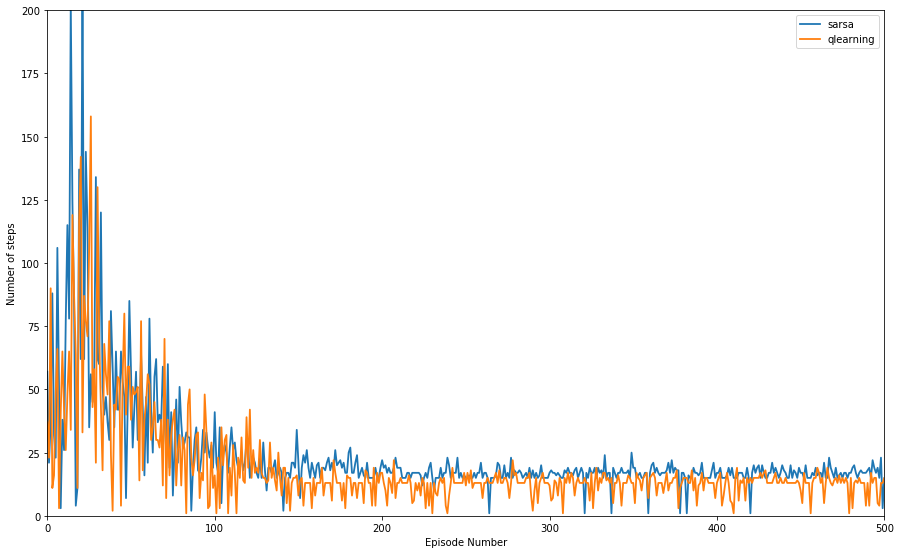

In [10]:
from more_itertools import chunked
plt.figure(figsize=(15,9.3))

s_sarsa = [sum(x) / len(x) for x in chunked(step_cache_sarsa, 1)]
s_qlearning = [sum(x) / len(x) for x in chunked(step_cache_qlearning, 1)]
l1, = plt.plot(s_sarsa, lw = 1.8)
l2, = plt.plot(s_qlearning, lw = 1.8)
plt.xlim((0, 500))
plt.ylim((0, 200))
plt.xlabel('Episode Number')
plt.ylabel('Number of steps')
plt.legend(handles = [l1, l2,], labels = ['sarsa', 'qlearning'], loc = 'best')
plt.savefig('steps400.png')
plt.show()

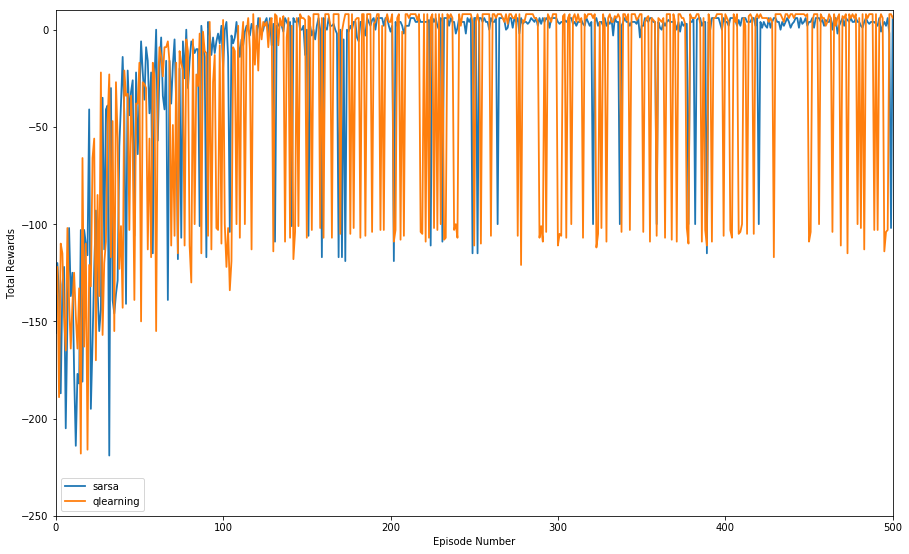

In [11]:
plt.figure(figsize=(15,9.3))
r_sarsa = [sum(x) / len(x) for x in chunked(reward_cache_sarsa, 1)]
r_qlearning = [sum(x) / len(x) for x in chunked(reward_cache_qlearning, 1)]

l1, = plt.plot(r_sarsa, alpha = 1, lw = 1.8)
l2, = plt.plot(r_qlearning, alpha = 1, lw = 1.8)
plt.xlim((0, 500))
plt.ylim((-250, 10))
plt.xlabel('Episode Number')
plt.ylabel('Total Rewards')
plt.legend(handles = [l1, l2,], labels = ['sarsa', 'qlearning'], loc = 'best')
plt.savefig('rewards400.png')
plt.show()

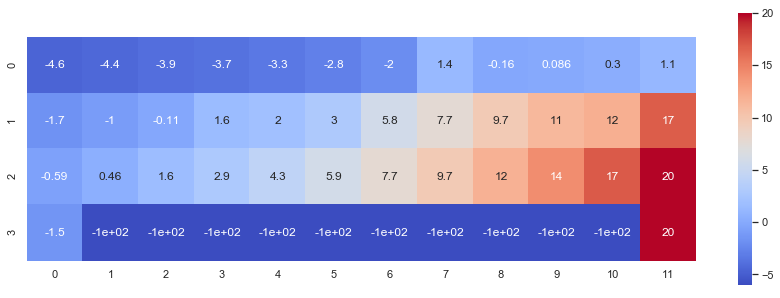

In [12]:
import seaborn as sns; sns.set()
    
#q_table_qlearning = np.max(q_table,0).reshape(4,12)
plt.figure(figsize=(15,5))
q_table_qlearning = np.max(q_table_q, axis = 0)
for i in range(len(q_table_qlearning)):
    if i>= 37 and i <= 46:
        q_table_qlearning[i] = -100
    elif i == 47:
        q_table_qlearning[i] = 20

q_table_qlearning = q_table_qlearning.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_qlearning), cmap ='coolwarm', annot = True, vmin = -6, vmax = 20)

#print(ax_q)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

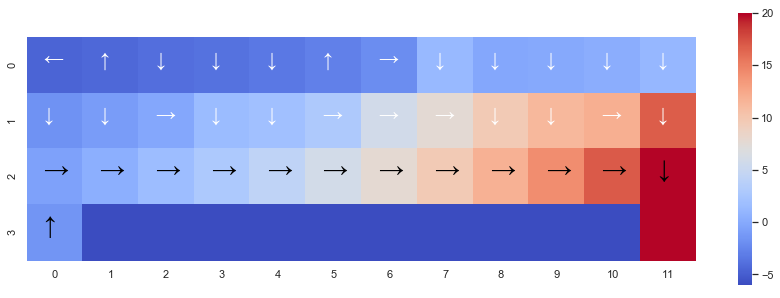

In [13]:
h_ = np.argmax(q_table_q,0).tolist()

h_ = ['↑' if i==0  else i for i in h_]
h_ = ['←' if i==1  else i for i in h_]
h_ = ['→' if i==2  else i for i in h_]
h_ = ['↓' if i==3  else i for i in h_]
for i in range(len(h_)):
    if i>= 37:
        h_[i] = ''
h_ = np.asarray(h_).reshape(4,12)

import seaborn as sns; sns.set()
    
#q_table_qlearning = np.max(q_table,0).reshape(4,12)
plt.figure(figsize=(15,5))

q_table_qlearning = np.max(q_table_q, axis = 0)
for i in range(len(q_table_qlearning)):
    if i>= 37 and i <= 46:
        q_table_qlearning[i] = -100
    elif i == 47:
        q_table_qlearning[i] = 20

q_table_qlearning = q_table_qlearning.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_qlearning), cmap ='coolwarm', vmin = -6, vmax = 20)

for i in range(2):
    for j in range(12):
        text = ax.text(j+0.3, i+0.5, h_[i, j], color="w", fontsize = 20, weight = "bold")
#print(ax_q)
i = 2
for j in range(12):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")
i = 3
for j in range(12):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")
    
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("q_learning.png")
plt.show()

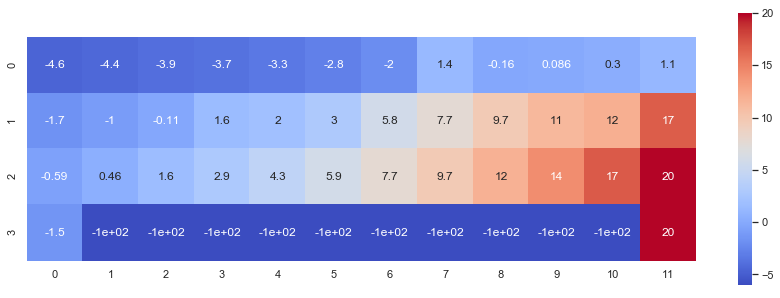

In [14]:
import seaborn as sns; sns.set()
    
#q_table_qlearning = np.max(q_table,0).reshape(4,12)
plt.figure(figsize=(15,5))
q_table_sarsa = np.max(q_table_q, axis = 0)
for i in range(len(q_table_sarsa)):
    if i>= 37 and i <= 46:
        q_table_sarsa[i] = -100
    elif i == 47:
        q_table_sarsa[i] = 20

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap ='coolwarm', annot = True, vmin = -6, vmax = 20)

#print(ax_q)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

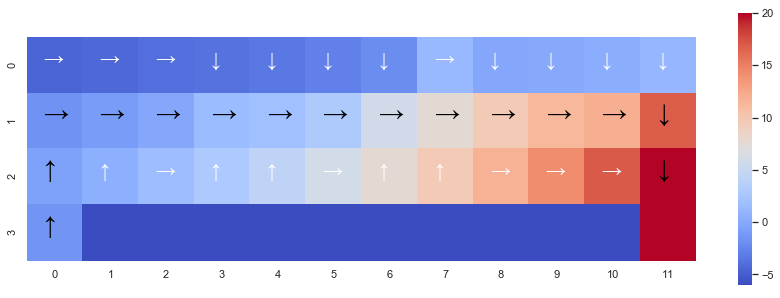

In [15]:
h_ = np.argmax(q_table_s,0).tolist()

h_ = ['↑' if i==0  else i for i in h_]
h_ = ['←' if i==1  else i for i in h_]
h_ = ['→' if i==2  else i for i in h_]
h_ = ['↓' if i==3  else i for i in h_]
for i in range(len(h_)):
    if i>= 37:
        h_[i] = ''
h_ = np.asarray(h_).reshape(4,12)

import seaborn as sns; sns.set()
    
#q_table_qlearning = np.max(q_table,0).reshape(4,12)
plt.figure(figsize=(15,5))


q_table_sarsa = np.max(q_table_q, axis = 0)
for i in range(len(q_table_sarsa)):
    if i>= 37 and i <= 46:
        q_table_sarsa[i] = -100
    elif i == 47:
        q_table_sarsa[i] = 20

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap ='coolwarm', vmin = -6, vmax = 20)

i = 0
for j in range(12):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="w", fontsize = 20, weight = "bold")
i = 1
for j in range(12):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")
i = 2
for j in range(1,11):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="w", fontsize = 20, weight = "bold")
j = 0
text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")
j = 11
text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")
i = 3
for j in range(12):
    text = ax.text(j+0.3, i+0.5, h_[i, j], color="black", fontsize = 25, weight = "bold")


#print(ax_q)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("sarsa_.png")
plt.show()

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=-6, vmax=20)
cmap = cm.coolwarm

m = cm.ScalarMappable(norm=norm, cmap=cmap)


def plot_4tri(plt,x,y, color):
    
    X = np.array([[x,y], [x,y+1], [x+1,y+1], [x+1,y], [x+0.5,y+0.5]])
    Y = [m.to_rgba(color[0]), m.to_rgba(color[1]), m.to_rgba(color[2]), m.to_rgba(color[3])]

    plt.scatter(X[:, 0], X[:, 1], s = 0, color = Y[:])

    t1 = plt.Polygon(X[[1,2,4],:], color=Y[0])
    plt.gca().add_patch(t1)

    t2 = plt.Polygon(X[[0,1,4],:], color=Y[1])
    plt.gca().add_patch(t2)

    t3 = plt.Polygon(X[[2,3,4],:], color=Y[2])
    plt.gca().add_patch(t3)

    t4 = plt.Polygon(X[[0,3,4],:], color=Y[3])
    plt.gca().add_patch(t4)

    plt.axis('equal')
    return plt

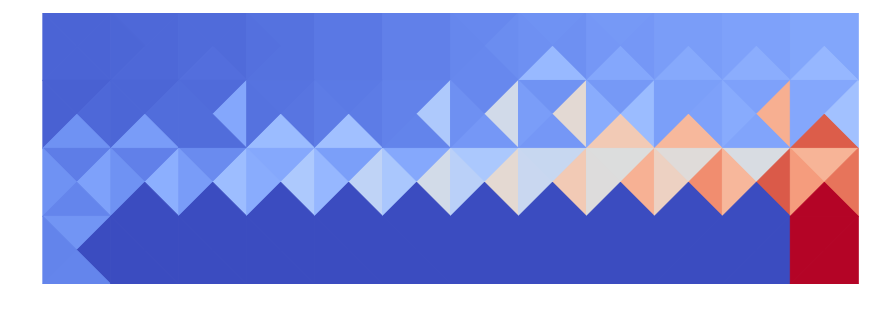

In [17]:
def plot_q_table(plt, q_table):
    for i in range(48):
        x = int(i/12)
        y = i - 12*int(i/12)
        color = [q_table[0][i], q_table[1][i], q_table[2][i], q_table[3][i]]
        plot_4tri(plt,y,4-x,color)
    return plt

for j in range(4):
    for i in range(48):
        if i>= 37 and i <= 46:
            q_table_q[j][i] = -100
        elif i == 47:
            q_table_q[j][i] = 20

for j in range(4):
    for i in range(48):
        if i>= 37 and i <= 46:
            q_table_s[j][i] = -100
        elif i == 47:
            q_table_s[j][i] = 20

fig = plt.figure(figsize=(15,5))
plot_q_table(plt, q_table_q)
plt.margins(0,0)
plt.axis('off')

plt.show()
fig.savefig('q_table_qlearning.png', transparent=True, bbox_inches='tight')

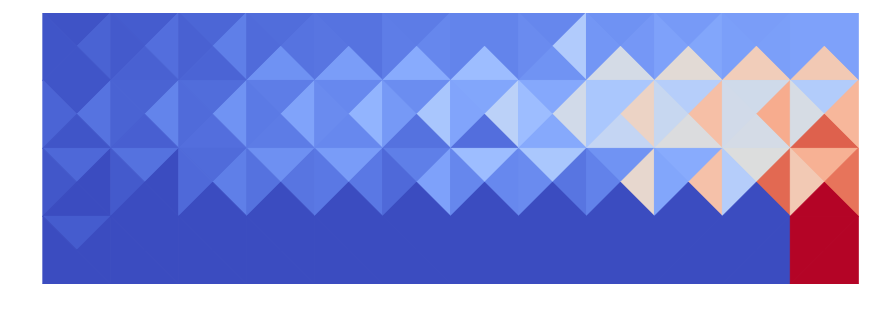

In [18]:
fig = plt.figure(figsize=(15,5))
plot_q_table(plt, q_table_s)
plt.margins(0,0)
plt.axis('off')

plt.show()
fig.savefig('q_table_sarsa.png', transparent=True, bbox_inches='tight')

### 2.2 How the value of epsilon influence the result

In [19]:
def reward_cliff(rewards):
    c_cliff = 0
    reward_notcliff = []
    for r in rewards:
        if r <= -100:
            c_cliff +=1
        else:
            reward_notcliff.append(r)
    return [c_cliff*100/len(rewards), np.mean(reward_notcliff)]

In [20]:
list_c_cliff_s = []
list_reward_notcliff_s = []
list_c_cliff_q = []
list_reward_notcliff_q = []
for e in np.arange(0.5, -0.01, -0.01):
    q_table_q, reward_cache_qlearning, step_cache_qlearning = qlearning(epsilon=e)
    q_table_s, reward_cache_sarsa, step_cache_sarsa = sarsa(epsilon=e)
    r_sarsa = [sum(x) / len(x) for x in chunked(reward_cache_sarsa, 1)]
    r_qlearning = [sum(x) / len(x) for x in chunked(reward_cache_qlearning, 1)]
    [c_cliff_s, reward_notcliff_s] = reward_cliff(r_sarsa[1000:])
    [c_cliff_q, reward_notcliff_q] = reward_cliff(r_qlearning[1000:])
    list_c_cliff_s.append(c_cliff_s)
    list_reward_notcliff_s.append(reward_notcliff_s)
    list_c_cliff_q.append(c_cliff_q)
    list_reward_notcliff_q.append(reward_notcliff_q)

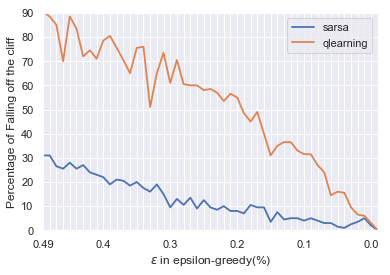

In [21]:
l1, = plt.plot(list_c_cliff_s, alpha = 1, lw = 1.8)
l2, = plt.plot(list_c_cliff_q, alpha = 1, lw = 1.8)
plt.xlim((0, 50))
plt.ylim((0, 90))
plt.xlabel(r'$\epsilon$ in epsilon-greedy(%)')
plt.ylabel('Percentage of Falling off the cliff')
plt.legend(handles = [l1, l2,], labels = ['sarsa', 'qlearning'], loc = 'best')
bars = np.array([ 0.49  , '' , '' ,  '',  '',  '',  '',  '',  '', 0.4,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.3,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.2,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.1,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.0])
y_pos = np.arange(51)
plt.xticks(y_pos, bars)
plt.savefig('cliff.png')
plt.show()

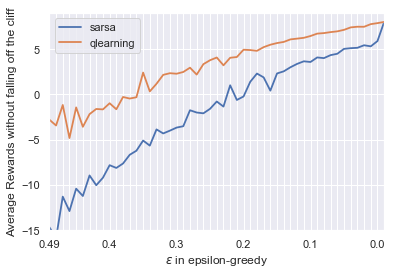

In [22]:
l1, = plt.plot(list_reward_notcliff_s, alpha = 1, lw = 1.8)
l2, = plt.plot(list_reward_notcliff_q, alpha = 1, lw = 1.8)
plt.xlim((0, 50))
plt.ylim((-15, 9))
plt.xlabel(r'$\epsilon$ in epsilon-greedy')
plt.ylabel('Average Rewards without falling off the cliff')
plt.legend(handles = [l1, l2,], labels = ['sarsa', 'qlearning'], loc = 'best')
bars = np.array([ 0.49  , '' , '' ,  '',  '',  '',  '',  '',  '', 0.4,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.3,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.2,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.1,
        '' , '' ,  '',  '',  '',  '',  '',  '', '', 0.0])
y_pos = np.arange(51)
plt.xticks(y_pos, bars)
plt.savefig('rewardscliff.png')
plt.show()